In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:

# Função para aplicar o filtro de média móvel
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

# Função para aplicar o filtro de Kalman
def kalman_filter(data, Q=0.1, R=1):
    Q = 0.1  # Variância do processo
    R = 1  # Variância da medida
    P = 1  # Estimativa inicial de variância
    X = data[0]  # Estimativa inicial do estado
    
    kalman_filtered = []
    
    for measurement in data:
        P = P + Q
        K = P / (P + R)
        X = X + K * (measurement - X)
        P = (1 - K) * P
        kalman_filtered.append(X)
    
    return pd.Series(kalman_filtered)

In [3]:
data = pd.read_csv('dados_rpm_0.1hz.csv')

In [7]:
resposta = data['rpm']

In [8]:
freq_de_corte = 0.0007 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()

,0
0,3154.231792
1,3159.374154
2,3164.518744
3,3169.665543
4,3174.814533


In [9]:
print(resposta_filtrada.max())

0    8301.576414
dtype: float64


In [ ]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 1
print(f"Frequência de amostragem estimada: {Fs} Hz")


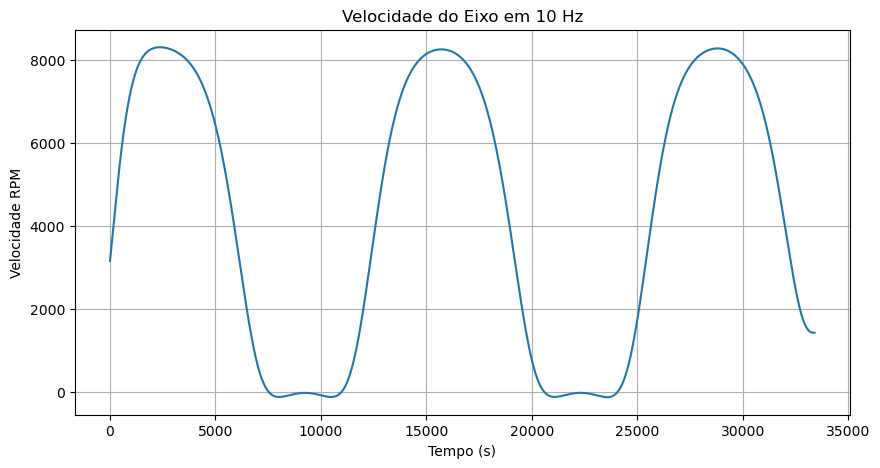

In [10]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(resposta_filtrada)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 1 Hz')
plt.grid()
plt.show()